In [25]:
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import numpy as np
import random

In [26]:
size = 50
points = size*np.random.random((size**2,2))
poly_map = Voronoi(points)

In [27]:
#fig = voronoi_plot_2d(poly_map)
#fig.set_size_inches(20,20)
#fig.show()

In [28]:
def check(vertices):
    for couple in vertices:
        if (any(x < 0 or x > size for x in couple)):
            return False
    return True

In [29]:
def lloyd_relax(self, times):
        for i in range(times):
            centroids = []
            for region in self.regions:
                if (region != []):
                    vertices = self.vertices[region]
                    if (check(vertices)):
                        centroid_x = np.sum(vertices[:, 0])/vertices.shape[0]
                        centroid_y = np.sum(vertices[:, 1])/vertices.shape[0]
                        centroid = [centroid_x, centroid_y]
                        centroids.append(centroid)
            points = centroids
            vor = Voronoi(points)
        return vor

In [30]:
lloyd = lloyd_relax(poly_map, 2)

In [31]:
import networkx
import itertools
import copy

In [32]:
cell_network = networkx.Graph()

edges = {}

for i, region in enumerate(lloyd.regions):
    for edge in list(itertools.combinations(region,2)):
        if edge in edges:
            edges[edge].append(i)
            edges[edge[::-1]].append(i)
        else:
            edges[edge] = [i]
            edges[edge[::-1]] = [i]

for i in edges:
    for j in edges[i]:
        cell_network.add_node(j,height = -10)
    if len(edges[i]) > 1:
        cell_network.add_edge(edges[i][0],edges[i][1])

#networkx.draw(cell_network)


In [33]:
itterations = 10

#peak generation
peaks_locs = []

for i in range(itterations):
    peak = random.randint(int(cell_network.number_of_nodes()*0.3),int(cell_network.number_of_nodes()*0.7))
    if check(lloyd.vertices[lloyd.regions[peak]]):
        cell_network.nodes[peak]["height"] = random.randint(30,50)
        peaks_locs.append(peak)

    

In [34]:
def elevation_decrease(cell:int,complete_cells:list[int],elevation:int):
    new_cells = copy.deepcopy(complete_cells)
    for n in cell_network.neighbors(cell):
        if (n not in new_cells):
            if cell_network.nodes[n]["height"] < elevation:
                cell_network.nodes[n]["height"] = elevation
                new_cells.append(n)
                
    for n in cell_network.neighbors(cell):
        elevation_decrease(n,new_cells,elevation-1)

In [40]:
def elevation_decrease2(cell:int,complete_cells:list[int],elevation:int):
    new_cells = copy.deepcopy(complete_cells)
    for n in cell_network.neighbors(cell):
        if random.randint(0,100) > 20:
            if (n not in new_cells):
                if cell_network.nodes[n]["height"] < elevation:
                    cell_network.nodes[n]["height"] = elevation
                    new_cells.append(n)
    for n in cell_network.neighbors(cell):
        if n not in new_cells:
            elevation_decrease2(n,new_cells,elevation-1)

In [36]:
#for peak in peaks_locs:
#    print(peak, cell_network.nodes[peak]["height"])

In [41]:
print(peaks_locs)
for peak in peaks_locs: 
    elevation_decrease2(peak,peaks_locs,cell_network.nodes[peak]["height"])

[1072, 835, 1252, 1455, 1094, 1320, 1030, 1495, 1417]


RecursionError: maximum recursion depth exceeded while calling a Python object

In [ ]:
import collections
groups = {}

for i in cell_network.nodes:
    height = cell_network.nodes[i]["height"]
    if(check(lloyd.vertices[lloyd.regions[i]])):
        if height in groups:
            groups[height].append(Polygon(lloyd.vertices[lloyd.regions[i]]))
        else:
            groups[height] = [Polygon(lloyd.vertices[lloyd.regions[i]])]
#print(groups)

peak_check = []
for i in peaks_locs:
    peak_check.append(Polygon(lloyd.vertices[lloyd.regions[i]]))

groups = collections.OrderedDict(sorted(groups.items()))

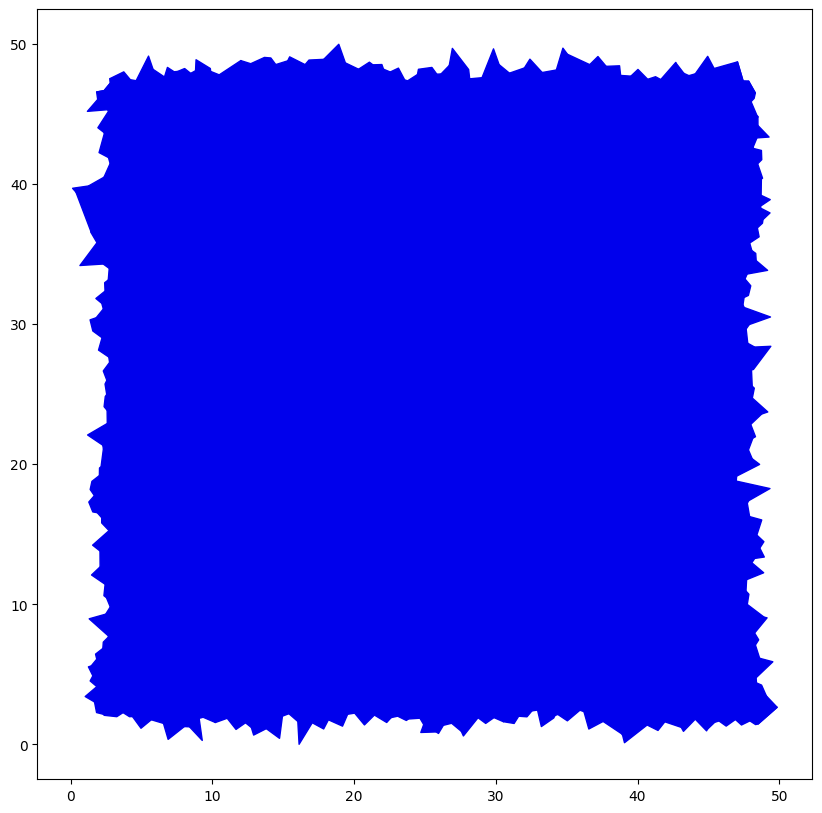

In [ ]:

fig, ax = plt.subplots(1)
sea = []
collections = []
beach = []
mountains_top = []
for i in groups:
    if i > 25:
        sea.append(PatchCollection(groups[i]))
    elif i > 23:
        beach.append(PatchCollection(groups[i]))
    elif i > 10:
        collections.append(PatchCollection(groups[i]))
    else:
        mountains_top.append(PatchCollection(groups[i]))




for count,i in enumerate(sea):
    ax.add_collection(i)
    i.set_color([(0,0,20)])

beach_colours = ["#FFFFCC","#FFFF99"]
for count,i in enumerate(beach):
    ax.add_collection(i)
    i.set_color(beach_colours[count])

for count,i in enumerate(collections):
    ax.add_collection(i)
    #print(200-count*2)
    i.set_color([(0,(200-count*5)/200,0)])
    #i.set_color([(0,0,0)])

mountains_top_colours = ["#FFFFFF","#F4F4F4","#F0F0F0","#E0E0E0","#D0D0D0","#C0C0C0","#B0B0B0","#A0A0A0","#909090","#808080","#707070","#606060","#505050","#404040","#303030","#303030","#303030"]
mountains_top_colours = mountains_top_colours[::-1]
for count,i in enumerate(mountains_top):
    ax.add_collection(i)
    i.set_color(mountains_top_colours[count])
    #print(count)

ax.autoscale_view()
fig.set_size_inches(10, 10)

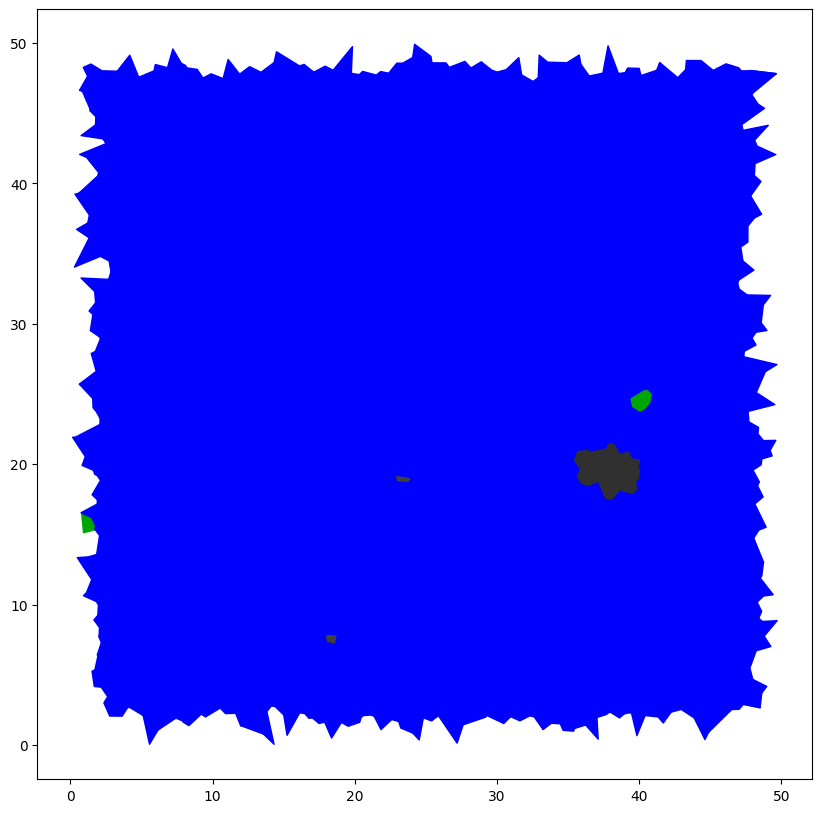

In [ ]:
fig, ax = plt.subplots(1)
deep = []
water = []
hills = []
plains = []
beach = []
mountains = []

for i in groups:
    if i > 40:
        mountains.append(PatchCollection(groups[i]))
    elif i > 25:
        hills.append(PatchCollection(groups[i]))
    elif i > 10:
        plains.append(PatchCollection(groups[i]))
    elif i > 5:
        beach.append(PatchCollection(groups[i]))
    elif i > 0:
        water.append(PatchCollection(groups[i]))
    else:
        deep.append(PatchCollection(groups[i]))

mountains_colours = ["#FFFFFF","#F4F4F4","#F0F0F0","#E0E0E0","#D0D0D0","#C0C0C0","#B0B0B0","#A0A0A0","#909090","#808080","#707070","#606060","#505050","#404040","#303030","#303030","#303030"]
mountains_colours = mountains_colours[::-1]
for count, i in enumerate(mountains):
    ax.add_collection(i)
    i.set_color(mountains_colours[count])

hills_colours = ["#006600","#006600","#006600","#007600","#007600","#007600","#008600","#008600","#008600","#009600","#009600","#009600","#00A600","#00A600","#00A600"]
hills_colours = hills_colours[::-1]
for count, i in enumerate(hills):
    ax.add_collection(i)
    i.set_color(hills_colours[count])


plains_colours = [["#00AA00"],["#00AA00"],["#00AA00"],["#00AA00"],["#00CC00"],["#00CC00"],["#00CC00"],["#00CC00"],["#00EE00"],["#00EE00"],["#00EE00"],["#00EE00"],["#33FF33"],["#33FF33"],["#33FF33"],["#33FF33"]]
plains_colours = plains_colours[::-1]
for count, i in enumerate(plains):
    ax.add_collection(i)
    i.set_color(plains_colours[count])

beach_colours = [["#FFFF66"],["#FFFF88"],["#FFFF88"],["#FFFFAA"],["#FFFFAA"]]
for count, i in enumerate(beach):
    ax.add_collection(i)
    i.set_color(beach_colours[count])

for i in water:
    ax.add_collection(i)
    i.set_color("#00FFFF")

for i in deep:
    ax.add_collection(i)
    i.set_color("#0000FF")

######

peaks_loc = PatchCollection(peak_check)
#ax.add_collection(peaks_loc)
#peaks_loc.set_color("#000000")

#####

ax.autoscale_view()
fig.set_size_inches(10, 10)